<a href="https://colab.research.google.com/github/semerriam/points-unknown/blob/main/projects/pj-turbulence/data/co2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CO2 in Atmosphere

Source: 

----

Testing Mapping

In [2]:
!pip install jsonschema==3.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
!pip install geopandas
import geopandas as gpd
import altair as alt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
countries = gpd.read_file('https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip')

In [5]:
boroughs = gpd.read_file('https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Borough_Boundary/FeatureServer/0/query?where=1=1&outFields=*&outSR=2263&f=pgeojson')

In [6]:
boroughs.to_crs('epsg:4326', inplace=True)

In [7]:
!pip install rasterio
import rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
centralParkDem = rasterio.open('https://brown-institute-assets.s3.amazonaws.com/Objects/pointsunknown/2021_Summer/Data/hh47elu.dem')

In [9]:
from rasterio.plot import show

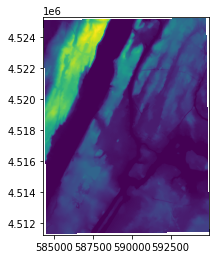

In [10]:
show(centralParkDem, cmap='viridis')

In [11]:
import requests
import json
from random import randrange

In [12]:
geoJsonFile = requests.get('https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/COLP/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=geojson')
cityProperties = json.loads(geoJsonFile.content)

In [13]:
cityPropertiesGeo = gpd.read_file('https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/COLP/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=geojson')

In [14]:
cityPropertiesGeo['LEASED'].replace('L', 'Leased', inplace=True)
# cityPropertiesGeo['LEASED'].replace('None', 'Owned', inplace=True)

In [15]:
cityPropertiesGeo['LEASED'].fillna('Owned', inplace=True)

In [16]:
alt.Chart(cityPropertiesGeo).mark_geoshape().encode(
    color=alt.Color('LEASED:N', legend=alt.Legend(title="Owned or Leased"), scale=alt.Scale(range=['gold','gray'])),
    tooltip=['ADDRESS','AGENCY','USETYPE','LEASED']
).properties(
    width=400,
    height=400,
    title='New York City Properties'
).configure_view(
    strokeWidth=0,
)

alt.Chart(...)

----

Importing nc file?

In [17]:
#from netCDF4 import Dataset  # use scipy instead
from scipy.io import netcdf #### <--- This is the library to import.

In [18]:
import xarray as xr

In [19]:
file_name = '2019_mean.nc' 
# file_name = 'carbon_dioxide_2020.nc' 

In [20]:
nc = netcdf.netcdf_file(file_name,'r')

In [21]:
#Look at the variables available
nc.variables

OrderedDict([('longitude',
              <scipy.io.netcdf.netcdf_variable at 0x7faaf5447a10>),
             ('latitude', <scipy.io.netcdf.netcdf_variable at 0x7faaf5447910>),
             ('time', <scipy.io.netcdf.netcdf_variable at 0x7faaf5447f90>),
             ('decimal_time',
              <scipy.io.netcdf.netcdf_variable at 0x7faaf5447dd0>),
             ('time_components',
              <scipy.io.netcdf.netcdf_variable at 0x7faaf5449410>),
             ('bio_flux_opt',
              <scipy.io.netcdf.netcdf_variable at 0x7faaf5449210>),
             ('ocn_flux_opt',
              <scipy.io.netcdf.netcdf_variable at 0x7faaf5449d10>),
             ('fossil_flux_imp',
              <scipy.io.netcdf.netcdf_variable at 0x7faaf5449a50>),
             ('fire_flux_imp',
              <scipy.io.netcdf.netcdf_variable at 0x7faaf5449750>)])

In [22]:
#Look at the dimensions
nc.dimensions

OrderedDict([('longitude', 360),
             ('latitude', 180),
             ('time', None),
             ('time_components', 6)])

In [23]:
# #Look at a specific variable's dimensions
# nc.variables['T2'].dimensions   ## output is ('Time', 'south_north', 'west_east')

In [24]:
# #Look at a specific variable's units
# nc.variables['T2'].units        ## output is ('K')

In [25]:
print(nc)

In [26]:
import netCDF4
import numpy as np

In [27]:
f = netCDF4.Dataset('2019_mean.nc')


In [28]:
f = netCDF4.Dataset(file_name)

In [29]:
print(f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    averaging_period_start_time: 2019/01/01 00:00:00 UTC
    averaging_period_end_time: 2019/01/01 03:00:00 UTC
    averaging_period_length_hours: 744
    email: carbontracker.team@noaa.gov
    url: http://carbontracker.noaa.gov
    institution: NOAA Earth System Research Laboratory
    Conventions: CF-1.5
    history: Created 2022-01-22 06:32:15 UTC by ./NRT_v2022-1.eaf.ml137.x. - processed Fri Jun 17 16:53:55 2022 by script with Time-stamp: <tfe07:/home/Andy.Jacobson/co2/andy/tools/R/make_monthly_flux1x1_nc.r: 16 Nov 2017 (Thu) 17:52:12 UTC>
    version: CT-NRT.v2022-1
    dimensions(sizes): longitude(360), latitude(180), time(1), time_components(6)
    variables(dimensions): float64 longitude(longitude), float64 latitude(latitude), float64 time(time), float64 decimal_time(time), int32 time_components(time, time_components), float64 bio_flux_opt(time, latitude, longitude), float64 ocn_flu

In [30]:
print(f.variables.keys()) # get all variable names

dict_keys(['longitude', 'latitude', 'time', 'decimal_time', 'time_components', 'bio_flux_opt', 'ocn_flux_opt', 'fossil_flux_imp', 'fire_flux_imp'])


Documentation: https://gml.noaa.gov/ccgg/carbontracker/CT2019B_doc.php#tth_sEc3

'longitude' <br>
'latitude' <br>
'time' <br>
'decimal_time' <br>
'time_components' <br>
'bio_flux_opt' : terrestrial biosphere CO2 flux<br>
'ocn_flux_opt' : Ocean CO2 flux<br>
'fossil_flux_imp' : fossil fuel CO2 flux <br>
'fire_flux_imp' : fire emissions CO2 flux

In [31]:
!pip install cdsapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import cdsapi
import netCDF4
from netCDF4 import num2date
import numpy as np
import os
import pandas as pd

In [33]:
cols = list(nc.variables.keys())

In [34]:
lat = nc.variables['latitude'][:]
lon = nc.variables['longitude'][:]
time = nc.variables['time'][:]
time_comp = nc.variables['time_components'][:]
decimal_time = nc.variables['decimal_time'][:]
bio_flux_opt = nc.variables['bio_flux_opt'][:]
ocn_flux_opt = nc.variables['ocn_flux_opt'][:]
fossil_flux_imp = nc.variables['fossil_flux_imp'][:]
fire_flux_imp = nc.variables['fire_flux_imp'][:]

Attempt at exporting as csv

In [35]:
# list_nc = []
# for c in cols:
#     list_nc.append(list(nc.variables[c][:]))

In [36]:
# df_nc = pd.DataFrame(list_nc)
# df_nc = df_nc.T
# df_nc.columns = cols

In [37]:
# df_nc.shape()

In [38]:
# df_nc.describe()

In [39]:
# df_nc.to_csv("2019_mean_a.csv", index = False)

In [40]:
#Look at the variables available
nc.variables

OrderedDict([('longitude',
              <scipy.io.netcdf.netcdf_variable at 0x7faaf5447a10>),
             ('latitude', <scipy.io.netcdf.netcdf_variable at 0x7faaf5447910>),
             ('time', <scipy.io.netcdf.netcdf_variable at 0x7faaf5447f90>),
             ('decimal_time',
              <scipy.io.netcdf.netcdf_variable at 0x7faaf5447dd0>),
             ('time_components',
              <scipy.io.netcdf.netcdf_variable at 0x7faaf5449410>),
             ('bio_flux_opt',
              <scipy.io.netcdf.netcdf_variable at 0x7faaf5449210>),
             ('ocn_flux_opt',
              <scipy.io.netcdf.netcdf_variable at 0x7faaf5449d10>),
             ('fossil_flux_imp',
              <scipy.io.netcdf.netcdf_variable at 0x7faaf5449a50>),
             ('fire_flux_imp',
              <scipy.io.netcdf.netcdf_variable at 0x7faaf5449750>)])

In [41]:
!apt install proj-bin libproj-dev libgeos-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libproj-dev is already the newest version (4.9.3-2).
proj-bin is already the newest version (4.9.3-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [42]:
# !pip install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz

In [43]:
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
# Get some parameters for the Stereographic Projection
lon_0 = lon.mean()
lat_0 = lat.mean()

m = Basemap(width=5000000,height=3500000,
            resolution='l',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

In [46]:
# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lon, lat)
xi, yi = m(lon, lat)

In [47]:
# lat = nc.variables['latitude'][:]
# lon = nc.variables['longitude'][:]
# time = nc.variables['time'][:]
# time_comp = nc.variables['time_components'][:]
# decimal_time = nc.variables['decimal_time'][:]
# bio_flux_opt = nc.variables['bio_flux_opt'][:]
# ocn_flux_opt = nc.variables['ocn_flux_opt'][:]
# fossil_flux_imp = nc.variables['fossil_flux_imp'][:]
# fire_flux_imp = nc.variables['fire_flux_imp'][:]

In [48]:
bio_flux_opt_units = nc.variables['bio_flux_opt'].units
ocn_flux_opt_units = nc.variables['ocn_flux_opt'].units
fossil_flux_imp_units = nc.variables['fossil_flux_imp'].units
fire_flux_imp_units = nc.variables['fire_flux_imp'].units

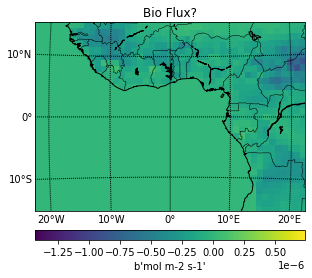

In [49]:
# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(bio_flux_opt))

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(bio_flux_opt_units)

# Add Title
plt.title('Bio Flux?')

plt.show()

In [51]:
# https://www.earthinversion.com/utilities/reading-NetCDF4-data-in-python/

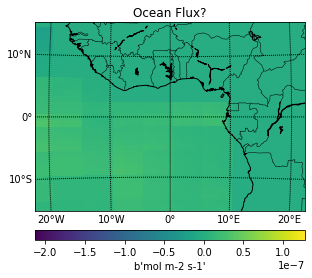

In [52]:
# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(ocn_flux_opt))

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(ocn_flux_opt_units)

# Add Title
plt.title('Ocean Flux?')

plt.show()

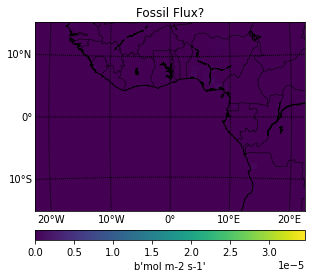

In [53]:
# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(fossil_flux_imp))

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(fossil_flux_imp_units)

# Add Title
plt.title('Fossil Flux?')

plt.show()

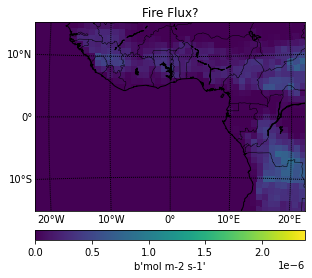

In [54]:
# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(fire_flux_imp))

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(fire_flux_imp_units)

# Add Title
plt.title('Fire Flux?')

plt.show()

In [55]:
# plt.rcParams['figure.figsize'] = (12.0, 8.0)

# # These lines do the actual plotting
# plt.contourf(n, 20)
# plt.show()

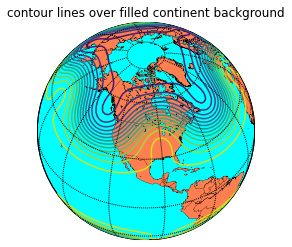

In [56]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
map = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# make up some data on a regular lat/lon grid.
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
# compute native map projection coordinates of lat/lon grid.
x, y = map(lons*180./np.pi, lats*180./np.pi)
# contour data over the map.
cs = map.contour(x,y,wave+mean,15,linewidths=1.5)
plt.title('contour lines over filled continent background')
plt.show()

----

### Emissions by country

In [57]:
# Importing libraries
import numpy as np
import pandas as pd

In [58]:
# Loading base dataset
emissionsData = pd.read_csv('world_bank_emissions_data_edited.csv')

In [59]:
emissionsData.sample(2)

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
212,Togo,TGO,970.0,920.0,750.0,630.0,910.0,980.0,1360.0,760.0,...,2820.0,2630.0,2510.0,2230.0,1750.0,1590.0,1820.0,2300.0,2070.0,2260.0
186,Rwanda,RWA,520.0,470.0,480.0,480.0,460.0,450.0,460.0,480.0,...,560.0,570.0,650.0,720.0,780.0,810.0,930.0,1050.0,1050.0,1080.0


In [68]:
emissionsData.columns = emissionsData.columns.str.lower().str.replace(" ", "_")

In [69]:
emissionsData.sample(2)

,country_name,country_code,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
140,Maldives,MDV,160.0000,160.0000,230.0000,200.0000,200.00,260.000,280.000,340.000,...,910.000,960.000,1010.000,1140.000,1130.000,1360.000,1350.000,1750.000,1820.000,1910.000
125,Latin America & Caribbean,LCN,898155.2161,922778.6148,943128.9506,973334.7356,1022733.78,1046524.896,1128920.918,1197959.813,...,1529249.069,1611015.804,1672787.447,1731737.447,1775929.647,1787601.909,1780141.811,1745155.474,1710737.524,1686621.615


In [73]:
emissionsData.head(2)

,country_name,country_code,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Africa Eastern and Southern,AFE,306071.6029,300568.7844,296542.458,302708.3114,308733.8039,326720.0494,337106.7553,353448.7732,...,509179.1809,536950.5856,528849.7571,552280.0,573190.0,594270.0,578990.0,584830.0,593740.0,592780.0
1,Afghanistan,AFG,2960.0000,2740.0000,1430.000,1360.0000,1300.0000,1250.0000,1180.0000,1100.0000,...,6000.0000,8670.0000,12260.0000,10450.0,8510.0,7810.0,7990.0,7390.0,7380.0,7440.0


In [62]:
countries = gpd.read_file('ne_10m_admin_0_countries.zip')

In [63]:
countries.sample(2)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
256,Admin-0 country,6,5,Serranilla Bank,SER,0,2,Indeterminate,1,Serranilla Bank,...,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,"POLYGON ((-78.63707 15.86209, -78.64041 15.864..."
207,Admin-0 country,3,6,Saint Kitts and Nevis,KNA,0,2,Sovereign country,1,Saint Kitts and Nevis,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-62.59923 17.20295, -62.57844 ..."


In [70]:
countries.columns = countries.columns.str.lower().str.replace(" ", "_")

In [71]:
countries.sample(2)

,featurecla,scalerank,labelrank,sovereignt,sov_a3,adm0_dif,level,type,tlc,admin,...,fclass_tr,fclass_id,fclass_pl,fclass_gr,fclass_it,fclass_nl,fclass_se,fclass_bd,fclass_ua,geometry
23,Admin-0 country,0,4,Guyana,GUY,0,2,Sovereign country,1,Guyana,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-56.48182 1.94161, -56.52851 1..."
136,Admin-0 country,0,3,Ecuador,ECU,0,2,Sovereign country,1,Ecuador,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-78.82868 1.43431, -78.76997 1..."


In [72]:
countries.head(2)

,featurecla,scalerank,labelrank,sovereignt,sov_a3,adm0_dif,level,type,tlc,admin,...,fclass_tr,fclass_id,fclass_pl,fclass_gr,fclass_it,fclass_nl,fclass_se,fclass_bd,fclass_ua,geometry
0,Admin-0 country,0,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,0,3,Malaysia,MYS,0,2,Sovereign country,1,Malaysia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."


In [79]:
countries2 = countries.rename(columns={'sov_a3': 'country_code'})

In [80]:
countries2.sample(2)

,featurecla,scalerank,labelrank,sovereignt,country_code,adm0_dif,level,type,tlc,admin,...,fclass_tr,fclass_id,fclass_pl,fclass_gr,fclass_it,fclass_nl,fclass_se,fclass_bd,fclass_ua,geometry
206,Admin-0 country,3,6,Antigua and Barbuda,ATG,0,2,Sovereign country,1,Antigua and Barbuda,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-61.88362 17.04902, -61.87922 ..."
146,Admin-0 country,0,3,Cameroon,CMR,0,2,Sovereign country,1,Cameroon,...,None,None,None,None,None,None,None,None,None,"POLYGON ((11.32208 2.16576, 11.02298 2.16571, ..."


In [81]:
countries_geo = countries2.merge(emissionsData, on='country_code')

In [83]:
pd.set_option("display.max_columns", None)

In [84]:
countries_geo.sample(5)

,featurecla,scalerank,labelrank,sovereignt,country_code,adm0_dif,level,type,tlc,admin,adm0_a3,geou_dif,geounit,gu_a3,su_dif,subunit,su_a3,brk_diff,name,name_long,brk_a3,brk_name,brk_group,abbrev,postal,formal_en,formal_fr,name_ciawf,note_adm0,note_brk,name_sort,name_alt,mapcolor7,mapcolor8,mapcolor9,mapcolor13,pop_est,pop_rank,pop_year,gdp_md,gdp_year,economy,income_grp,fips_10,iso_a2,iso_a2_eh,iso_a3,iso_a3_eh,iso_n3,iso_n3_eh,un_a3,wb_a2,wb_a3,woe_id,woe_id_eh,woe_note,adm0_iso,adm0_diff,adm0_tlc,adm0_a3_us,adm0_a3_fr,adm0_a3_ru,adm0_a3_es,adm0_a3_cn,adm0_a3_tw,adm0_a3_in,adm0_a3_np,adm0_a3_pk,adm0_a3_de,adm0_a3_gb,adm0_a3_br,adm0_a3_il,adm0_a3_ps,adm0_a3_sa,adm0_a3_eg,adm0_a3_ma,adm0_a3_pt,adm0_a3_ar,adm0_a3_jp,adm0_a3_ko,adm0_a3_vn,adm0_a3_tr,adm0_a3_id,adm0_a3_pl,adm0_a3_gr,adm0_a3_it,adm0_a3_nl,adm0_a3_se,adm0_a3_bd,adm0_a3_ua,adm0_a3_un,adm0_a3_wb,continent,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,min_zoom,min_label,max_label,label_x,label_y,ne_id,wikidataid,name_ar,name_bn,name_de,name_en,name_es,name_fa,name_fr,name_el,name_he,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_uk,name_ur,name_vi,name_zh,name_zht,fclass_iso,tlc_diff,fclass_tlc,fclass_us,fclass_fr,fclass_ru,fclass_es,fclass_cn,fclass_tw,fclass_in,fclass_np,fclass_pk,fclass_de,fclass_gb,fclass_br,fclass_il,fclass_ps,fclass_sa,fclass_eg,fclass_ma,fclass_pt,fclass_ar,fclass_jp,fclass_ko,fclass_vn,fclass_tr,fclass_id,fclass_pl,fclass_gr,fclass_it,fclass_nl,fclass_se,fclass_bd,fclass_ua,geometry,country_name,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Admin-0 country,0,3,Malaysia,MYS,0,2,Sovereign country,1,Malaysia,MYS,0,Malaysia,MYS,0,Malaysia,MYS,0,Malaysia,Malaysia,MYS,Malaysia,None,Malay.,MY,Malaysia,None,Malaysia,None,None,Malaysia,None,2,4,3,6,31949777.0,15,2019,364681,2019,6. Developing region,3. Upper middle income,MY,MY,MY,MYS,MYS,458,458,458,MY,MYS,23424901,23424901,Exact WOE match as country,MYS,None,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,-99,-99,Asia,Asia,South-Eastern Asia,East Asia & Pacific,8,8,6,-99,1,0.0,3.0,8.0,113.837080,2.528667,1159321083,Q833,ماليزيا,মালয়েশিয়া,Malaysia,Malaysia,Malasia,مالزی,Malaisie,Μαλαισία,מלזיה,मलेशिया,Malajzia,Malaysia,Malaysia,マレーシア,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Малайзія,ملائیشیا,Malaysia,马来西亚,馬來西亞,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",Malaysia,56190.0,63330.0,68870.0,71190.0,77000.0,83880.0,95710.0,102500.0,103040.0,111820.0,121650.0,126770.0,136330.0,143810.0,157470.0,166410.0,172680.0,188340.0,201130.0,181020.0,199110.0,201670.0,203280.0,219820.0,231680.0,232550.0,228640.0,222890.0,239620.0
26,Admin-0 country,0,4,Belarus,BLR,0,2,Sovereign country,1,Belarus,BLR,0,Belarus,BLR,0,Belarus,BLR,0,Belarus,Belarus,BLR,Belarus,None,Bela.,BY,Republic of Belarus,None,Belarus,None,None,Belarus,None,1,1,5,11,9466856.0,13,2019,63080,2019,6. Developing region,3. Upper middle income,BO,BY,BY,BLR,BLR,112,112,112,BY,BLR,23424765,23424765,Exact WOE match as country,BLR,None,BLR,BLR,BLR,BLR,BLR,BLR,BLR,BLR,BLR,BLR,BLR,BLR,BLR,BLR,BLR,BLR,BLR,BLR,BLR,BLR,BLR,BLR,BLR,BLR,BLR,BLR,BLR,BLR,BLR,BLR,BLR,BLR,-99,-99,Europe,Europe,Eastern Europe,Europe & Central Asia,7,7,5,-99,1,0.0,3.0,8.0,28.417701,53.821888,1159320427,Q184,بيلاروسيا,বেলারুশ,Belarus,Belarus,Bielorrusia,بلاروس,Biélorussie,Λευκορωσία,בלארוס,बेलारूस,Fehéroroszország,Belarus,Bielorussia,ベラルーシ,벨라루스,Wit-Rusland,Białoruś,Bielorrússia,Белоруссия,Belarus,Beyaz Rusya,Білорусь,بیلاروس,Belarus,白俄罗斯,白俄羅斯,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None

In [85]:
countries_geo.head(5)

,featurecla,scalerank,labelrank,sovereignt,country_code,adm0_dif,level,type,tlc,admin,adm0_a3,geou_dif,geounit,gu_a3,su_dif,subunit,su_a3,brk_diff,name,name_long,brk_a3,brk_name,brk_group,abbrev,postal,formal_en,formal_fr,name_ciawf,note_adm0,note_brk,name_sort,name_alt,mapcolor7,mapcolor8,mapcolor9,mapcolor13,pop_est,pop_rank,pop_year,gdp_md,gdp_year,economy,income_grp,fips_10,iso_a2,iso_a2_eh,iso_a3,iso_a3_eh,iso_n3,iso_n3_eh,un_a3,wb_a2,wb_a3,woe_id,woe_id_eh,woe_note,adm0_iso,adm0_diff,adm0_tlc,adm0_a3_us,adm0_a3_fr,adm0_a3_ru,adm0_a3_es,adm0_a3_cn,adm0_a3_tw,adm0_a3_in,adm0_a3_np,adm0_a3_pk,adm0_a3_de,adm0_a3_gb,adm0_a3_br,adm0_a3_il,adm0_a3_ps,adm0_a3_sa,adm0_a3_eg,adm0_a3_ma,adm0_a3_pt,adm0_a3_ar,adm0_a3_jp,adm0_a3_ko,adm0_a3_vn,adm0_a3_tr,adm0_a3_id,adm0_a3_pl,adm0_a3_gr,adm0_a3_it,adm0_a3_nl,adm0_a3_se,adm0_a3_bd,adm0_a3_ua,adm0_a3_un,adm0_a3_wb,continent,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,min_zoom,min_label,max_label,label_x,label_y,ne_id,wikidataid,name_ar,name_bn,name_de,name_en,name_es,name_fa,name_fr,name_el,name_he,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_uk,name_ur,name_vi,name_zh,name_zht,fclass_iso,tlc_diff,fclass_tlc,fclass_us,fclass_fr,fclass_ru,fclass_es,fclass_cn,fclass_tw,fclass_in,fclass_np,fclass_pk,fclass_de,fclass_gb,fclass_br,fclass_il,fclass_ps,fclass_sa,fclass_eg,fclass_ma,fclass_pt,fclass_ar,fclass_jp,fclass_ko,fclass_vn,fclass_tr,fclass_id,fclass_pl,fclass_gr,fclass_it,fclass_nl,fclass_se,fclass_bd,fclass_ua,geometry,country_name,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Admin-0 country,0,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,IDN,0,Indonesia,IDN,0,Indonesia,IDN,0,Indonesia,Indonesia,IDN,Indonesia,None,Indo.,INDO,Republic of Indonesia,None,Indonesia,None,None,Indonesia,None,6,6,6,11,270625568.0,17,2019,1119190,2019,4. Emerging region: MIKT,4. Lower middle income,ID,ID,ID,IDN,IDN,360,360,360,ID,IDN,23424846,23424846,Exact WOE match as country,IDN,None,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,-99,-99,Asia,Asia,South-Eastern Asia,East Asia & Pacific,9,9,5,-99,1,0.0,1.7,6.7,101.892949,-0.954404,1159320845,Q252,إندونيسيا,ইন্দোনেশিয়া,Indonesien,Indonesia,Indonesia,اندونزی,Indonésie,Ινδονησία,אינדונזיה,इंडोनेशिया,Indonézia,Indonesia,Indonesia,インドネシア,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Індонезія,انڈونیشیا,Indonesia,印度尼西亚,印度尼西亞,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",Indonesia,147990.0,161840.0,170910.0,185480.0,196930.0,222840.0,234480.0,257670.0,261140.0,278990.0,280170.0,301830.0,306060.0,335370.0,343160.0,344400.0,364100.0,379980.0,377180.0,394490.0,416940.0,480460.0,486750.0,454320.0,490050.0,490840.0,494980.0,532920.0,583110.0
1,Admin-0 country,0,3,Malaysia,MYS,0,2,Sovereign country,1,Malaysia,MYS,0,Malaysia,MYS,0,Malaysia,MYS,0,Malaysia,Malaysia,MYS,Malaysia,None,Malay.,MY,Malaysia,None,Malaysia,None,None,Malaysia,None,2,4,3,6,31949777.0,15,2019,364681,2019,6. Developing region,3. Upper middle income,MY,MY,MY,MYS,MYS,458,458,458,MY,MYS,23424901,23424901,Exact WOE match as country,MYS,None,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,MYS,-99,-99,Asia,Asia,South-Eastern Asia,East Asia & Pacific,8,8,6,-99,1,0.0,3.0,8.0,113.837080,2.528667,1159321083,Q833,ماليزيا,মালয়েশিয়া,Malaysia,Malaysia,Malasia,مالزی,Malaisie,Μαλαισία,מלזיה,मलेशिया,Malajzia,Malaysia,Malaysia,マレーシア,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Малайзія,ملائیشیا,Malaysia,马来西亚,馬來西亞,Admin-0 country,None,Admin-0 countr

In [86]:
countries_geo.tail(5)

,featurecla,scalerank,labelrank,sovereignt,country_code,adm0_dif,level,type,tlc,admin,adm0_a3,geou_dif,geounit,gu_a3,su_dif,subunit,su_a3,brk_diff,name,name_long,brk_a3,brk_name,brk_group,abbrev,postal,formal_en,formal_fr,name_ciawf,note_adm0,note_brk,name_sort,name_alt,mapcolor7,mapcolor8,mapcolor9,mapcolor13,pop_est,pop_rank,pop_year,gdp_md,gdp_year,economy,income_grp,fips_10,iso_a2,iso_a2_eh,iso_a3,iso_a3_eh,iso_n3,iso_n3_eh,un_a3,wb_a2,wb_a3,woe_id,woe_id_eh,woe_note,adm0_iso,adm0_diff,adm0_tlc,adm0_a3_us,adm0_a3_fr,adm0_a3_ru,adm0_a3_es,adm0_a3_cn,adm0_a3_tw,adm0_a3_in,adm0_a3_np,adm0_a3_pk,adm0_a3_de,adm0_a3_gb,adm0_a3_br,adm0_a3_il,adm0_a3_ps,adm0_a3_sa,adm0_a3_eg,adm0_a3_ma,adm0_a3_pt,adm0_a3_ar,adm0_a3_jp,adm0_a3_ko,adm0_a3_vn,adm0_a3_tr,adm0_a3_id,adm0_a3_pl,adm0_a3_gr,adm0_a3_it,adm0_a3_nl,adm0_a3_se,adm0_a3_bd,adm0_a3_ua,adm0_a3_un,adm0_a3_wb,continent,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,min_zoom,min_label,max_label,label_x,label_y,ne_id,wikidataid,name_ar,name_bn,name_de,name_en,name_es,name_fa,name_fr,name_el,name_he,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_uk,name_ur,name_vi,name_zh,name_zht,fclass_iso,tlc_diff,fclass_tlc,fclass_us,fclass_fr,fclass_ru,fclass_es,fclass_cn,fclass_tw,fclass_in,fclass_np,fclass_pk,fclass_de,fclass_gb,fclass_br,fclass_il,fclass_ps,fclass_sa,fclass_eg,fclass_ma,fclass_pt,fclass_ar,fclass_jp,fclass_ko,fclass_vn,fclass_tr,fclass_id,fclass_pl,fclass_gr,fclass_it,fclass_nl,fclass_se,fclass_bd,fclass_ua,geometry,country_name,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
173,Admin-0 country,5,6,Nauru,NRU,0,2,Sovereign country,1,Nauru,NRU,0,Nauru,NRU,0,Nauru,NRU,0,Nauru,Nauru,NRU,Nauru,None,Nauru,NR,Republic of Nauru,None,Nauru,None,None,Nauru,None,3,7,6,9,12581.0,6,2019,118,2019,6. Developing region,4. Lower middle income,NR,NR,NR,NRU,NRU,520,520,520,-99,-99,23424912,23424912,Exact WOE match as country,NRU,None,NRU,NRU,NRU,NRU,NRU,NRU,NRU,NRU,NRU,NRU,NRU,NRU,NRU,NRU,NRU,NRU,NRU,NRU,NRU,NRU,NRU,NRU,NRU,NRU,NRU,NRU,NRU,NRU,NRU,NRU,NRU,NRU,-99,-99,Oceania,Oceania,Micronesia,East Asia & Pacific,5,5,5,3,1,0.0,5.0,10.0,166.932644,-0.520261,1159321123,Q697,ناورو,নাউরু,Nauru,Nauru,Nauru,نائورو,Nauru,Ναουρού,נאורו,नौरु,Nauru,Nauru,Nauru,ナウル,나우루,Nauru,Nauru,Nauru,Науру,Nauru,Nauru,Науру,ناورو,Nauru,瑙鲁,諾魯,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((166.93881 -0.49041, 166.95558 -0.497...",Nauru,130.0,130.0,120.0,110.0,110.0,110.0,100.0,100.0,100.0,90.0,90.0,80.0,80.0,70.0,70.0,70.0,50.0,40.0,40.0,40.0,40.0,40.0,40.0,50.0,50.0,50.0,60.0,70.0,70.0
174,Admin-0 country,5,6,Federated States of Micronesia,FSM,0,2,Sovereign country,1,Federated States of Micronesia,FSM,0,Federated States of Micronesia,FSM,0,Federated States of Micronesia,FSM,0,Micronesia,Federated States of Micronesia,FSM,Micronesia,None,F.S.M.,FSM,Federated States of Micronesia,None,"Micronesia, Federated States of",None,None,"Micronesia, Federated States of",None,5,2,4,13,113815.0,9,2019,401,2018,6. Developing region,4. Lower middle income,FM,FM,FM,FSM,FSM,583,583,583,FM,FSM,23424815,23424815,Exact WOE match as country,FSM,None,FSM,FSM,FSM,FSM,FSM,FSM,FSM,FSM,FSM,FSM,FSM,FSM,FSM,FSM,FSM,FSM,FSM,FSM,FSM,FSM,FSM,FSM,FSM,FSM,FSM,FSM,FSM,FSM,FSM,FSM,FSM,FSM,-99,-99,Oceania,Oceania,Micronesia,East Asia & Pacific,10,30,6,-99,1,0.0,5.0,10.0,158.234019,6.887553,1159320691,Q702,ولايات ميكرونيسيا المتحدة,মাইক্রোনেশিয়া যুক্তরাজ্য,Föderierte Staaten von Mikronesien,Federated States of Micronesia,Estados Federados de Micronesia,میکرونزی,États fédérés de Micronésie,Ομόσπονδες Πολιτείες της Μικρονησίας,מיקרונזיה,माइक्रोनेशिया के संघीकृत राज्य,Mikronéziai Szövetségi Államok,Mikronesia,Stati Federati di Micr

In [90]:
countries_geo_2018 = countries_geo[['country_code','admin','pop_est','label_x','label_y','geometry', 'country_name','2018']].copy(deep=True)

In [91]:
countries_geo_2018.sample(2)

,country_code,admin,pop_est,label_x,label_y,geometry,country_name,2018
43,VNM,Vietnam,96462106.0,105.387292,21.715416,"MULTIPOLYGON (((107.52039 14.70458, 107.52225 ...",Vietnam,257860.0
87,SVN,Slovenia,2087946.0,14.915312,46.060760,"POLYGON ((13.64292 45.45943, 13.64282 45.45945...",Slovenia,14050.0


In [92]:
countriesPoints = countries_geo_2018.copy(deep=True)
countriesPoints['point'] = countriesPoints.representative_point()
countriesPoints['geometry'] = countriesPoints['point']
countriesPoints.drop(columns=['point'], inplace=True)


In [94]:
# Exporting datasets as GeoJSONs
countries_geo_2018.to_file('countries_geo_2018.geojson', driver='GeoJSON')
countriesPoints.to_file('countriesPoints.geojson', driver='GeoJSON')

In [ ]:
# !pip install geopandas # Use this if you are working on Google Colab
import geopandas as gpd

Source: https://www.naturalearthdata.com/downloads/10m-cultural-vectors/